In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fatalities-in-the-israeli-palestinian/fatalities_isr_pse_conflict_2000_to_2023.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/fatalities-in-the-israeli-palestinian/fatalities_isr_pse_conflict_2000_to_2023.csv')
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [4]:
df.columns

Index(['name', 'date_of_event', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'ammunition',
       'killed_by', 'notes'],
      dtype='object')

In [5]:
# Basic structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [6]:
# Count missing values in each column
df.isnull().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [7]:
# Drop text-heavy or irrelevant columns
df = df.drop(columns=['name', 'notes'])

# Fill missing age with median
df['age'] = df['age'].fillna(df['age'].median())

# Fill missing gender with mode
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

# Drop remaining rows with missing values
df = df.dropna()

In [8]:
# Convert date columns to datetime
df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['year'] = df['date_of_event'].dt.year
df['month'] = df['date_of_event'].dt.month

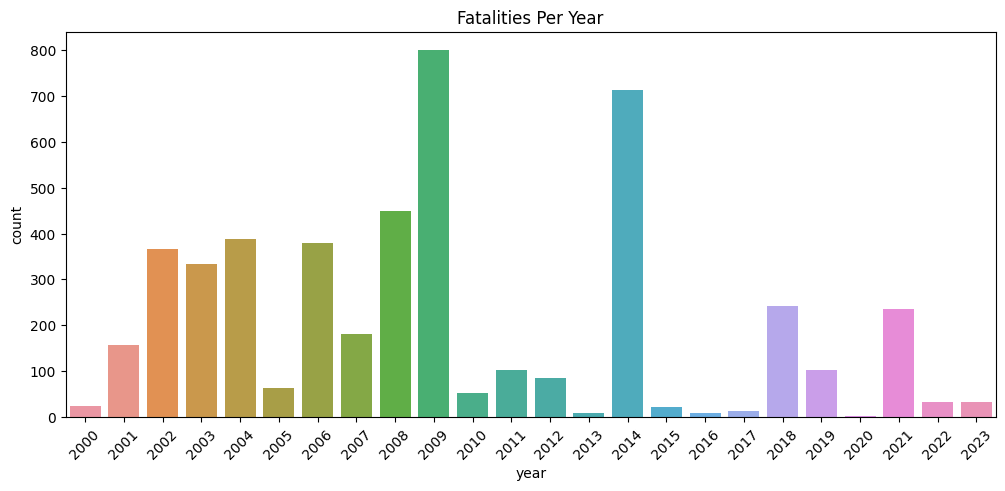

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fatalities per year
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='year', order=sorted(df['year'].unique()))
plt.title('Fatalities Per Year')
plt.xticks(rotation=45)
plt.show()

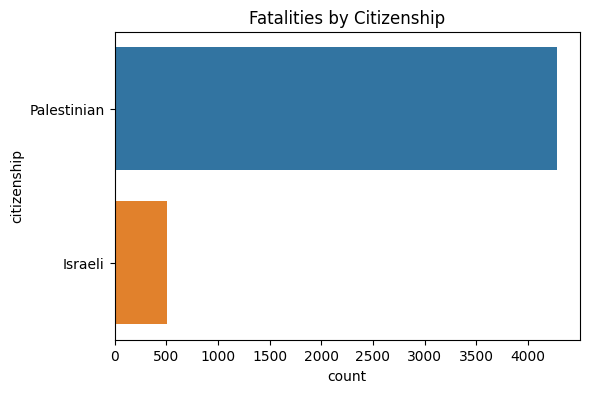

In [10]:
# Fatalities by citizenship
plt.figure(figsize=(6,4))
sns.countplot(data=df, y='citizenship', order=df['citizenship'].value_counts().index)
plt.title('Fatalities by Citizenship')
plt.show()

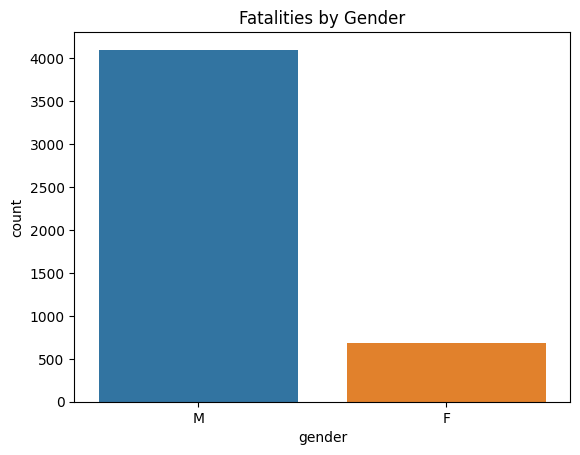

In [11]:
# Gender distribution
sns.countplot(data=df, x='gender')
plt.title('Fatalities by Gender')
plt.show()

In [12]:
# Select features and target
X = df[['age', 'gender', 'citizenship', 'took_part_in_the_hostilities', 'killed_by']]
y = df['type_of_injury']

In [13]:
# Convert categorical to numbers
X = pd.get_dummies(X)

# Encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
# Predict
y_pred = model.predict(X_test)

# Get unique labels in the test set
unique_labels = np.unique(y_test)

# Print classification report with labels and target names aligned
print(classification_report(
    y_test, y_pred,
    labels=unique_labels,
    target_names=le.inverse_transform(unique_labels)
))

              precision    recall  f1-score   support

   explosion       0.81      0.88      0.84       101
     gunfire       0.98      0.98      0.98       849
    shelling       0.00      0.00      0.00         4
    stabbing       0.00      0.00      0.00         5

    accuracy                           0.96       959
   macro avg       0.45      0.46      0.46       959
weighted avg       0.95      0.96      0.96       959



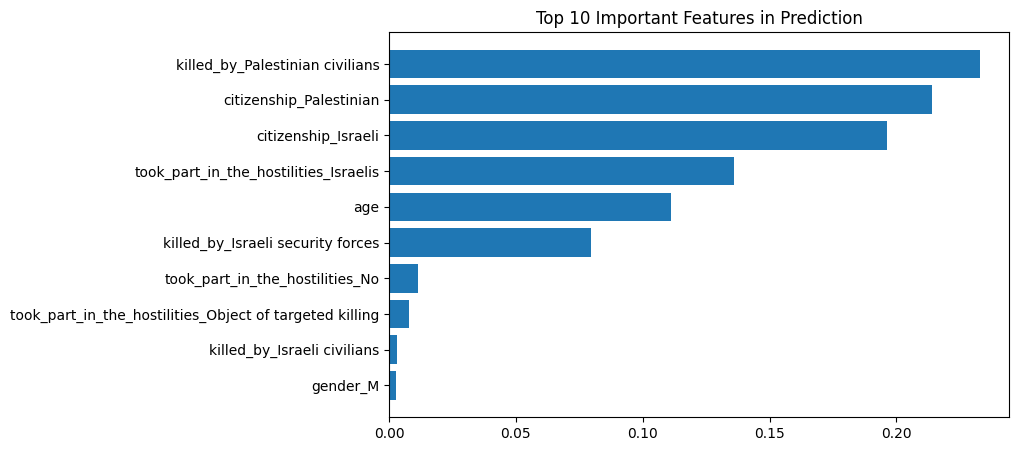

In [17]:
# Show most important features
import numpy as np

importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title('Top 10 Important Features in Prediction')
plt.show()